### Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

### Open required data frames. PATH, FLIGHT DATA, ERROR AND FEATURES

In [3]:
#Select which path you wanna visualize.
path_num = 5

energy_df = pd.read_csv('../data_base/paths_energy/feat_pathv12_nuevo.csv', sep=",")
fd_df = pd.read_csv('../data_base/flight_data/fd_pathv12_salo.txt', sep="|",low_memory=False)
path_df = pd.read_csv('../data_base/random_paths/path_v12_salo.txt', sep="|")

#Select only data from desired path
current_fdPoint_info = fd_df.loc[(fd_df['route_num'] == path_num)]
current_path_info = path_df.loc[(path_df['path_num'] == path_num)]
current_features_info = energy_df.loc[(energy_df['path_num'] == path_num)]

print(current_path_info)

if current_features_info.empty:
    print('Features está vacio')
elif current_fdPoint_info.empty:
    print('Flight Data está vacio')
elif current_path_info.empty:
    print('Path está vacio')

   path_num                                             points  \
4         5  9,9,1;8,10,1;10,10,1;8,8,1;8,9,1;1,2,1;2,1,1;6...   

                     times  
4  73,74,82,84,87,89,90,80  


### Graficas de posicion deseada vs posicion simulada.

intpointlist:  [[9, 9, 1], [8, 10, 1], [10, 10, 1], [8, 8, 1], [8, 9, 1], [1, 2, 1], [2, 1, 1], [6, 3, 1], [3, 3, 1]]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


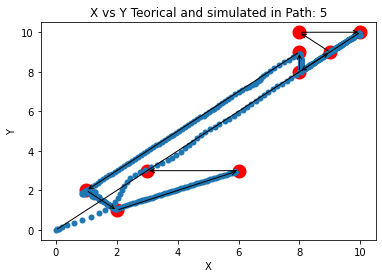

In [4]:
intPoints_list = []
prevX, prevY = 0,0 #For plotting arrows
#Extract points in path for graph
points_list = str(current_path_info['points'].iloc[0]).split(';')

for i in points_list:
    intPoints = list(map(int,i.split(','))) #convert time strings to int
    intPoints_list.append(intPoints)
        
#Graph extracted points
print('intpointlist: ', intPoints_list)
for loc in intPoints_list:
    plt.scatter(loc[0], loc[1], linewidths=8, color = 'red')
    plt.annotate(s='', xy=(loc[0],loc[1]), xytext=(prevX,prevY), arrowprops=dict(arrowstyle='->'))
    prevX, prevY = loc[0], loc[1]

plt.scatter(current_fdPoint_info['pos_x'], current_fdPoint_info['pos_y'],linewidths=0.01)
plt.title('X vs Y Teorical and simulated in Path: ' + str(path_num))
plt.xlabel('X')
plt.ylabel('Y')
#plt.xlim([-15, 15])
#plt.ylim([-15, 15])
plt.show()


### Error between drone and target (particle)

<AxesSubplot:xlabel='missing_points'>

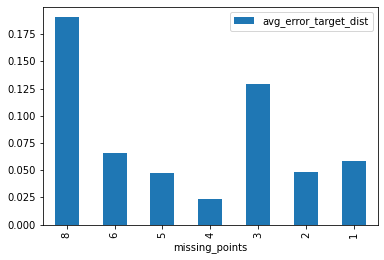

In [5]:
current_features_info.plot(x='missing_points', y = 'avg_error_target_dist', kind = 'bar')

## Energies depending on different variables.

### Distance plots

<AxesSubplot:xlabel='Energy'>

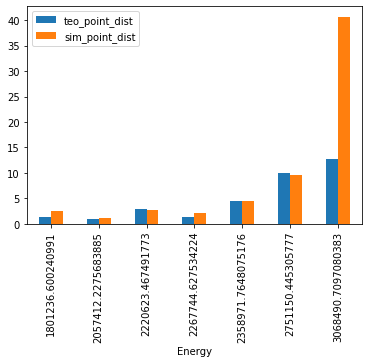

In [17]:
#Plot energy used depending of distance.
#sortedDF_dist = current_features_info.sort_values(by=['teo_point_dist'])
#sortedDF_dist.plot(x='teo_point_dist', y = 'Energy', kind = 'bar', color='blue')

sortedDF_dist = current_features_info.sort_values(by=['Energy'])
sortedDF_dist.plot(x='Energy', y = ['teo_point_dist','sim_point_dist'], kind = 'bar')


### Axis distance

<AxesSubplot:xlabel='teo_Ydist'>

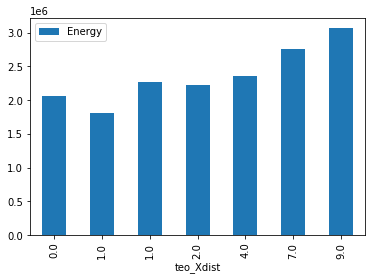

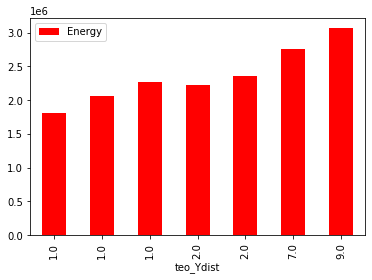

In [7]:
#Plot energy used depending of axis distance.
current_features_info['teo_Xdist'].abs()
#sortedDF_distX = current_features_info.sort_values(by=['teo_Xdist'])
#sortedDF_distX.plot(x='teo_Xdist', y = 'Energy', kind = 'bar')

sortedDF_distX = current_features_info.sort_values(by=['Energy'])
sortedDF_distX.plot(x='Energy', y = ['teo_Xdist','sim_Xdist'], kind = 'bar')

current_features_info['teo_Ydist'].abs()
#sortedDF_distX = current_features_info.sort_values(by=['teo_Ydist'])
#sortedDF_distX.plot(x='teo_Ydist', y = 'Energy', kind = 'bar', color = 'red')

sortedDF_distX = current_features_info.sort_values(by=['Energy'])
sortedDF_distX.plot(x='Energy', y = ['teo_Ydist','sim_Ydist'], kind = 'bar')

### Time plots

/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='teo_point_time', ylabel='sim_error'>

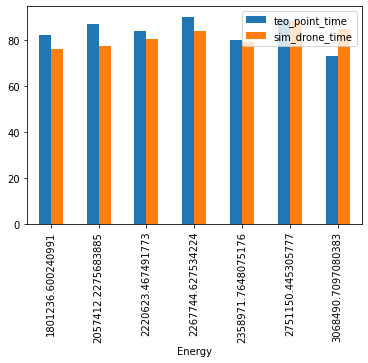

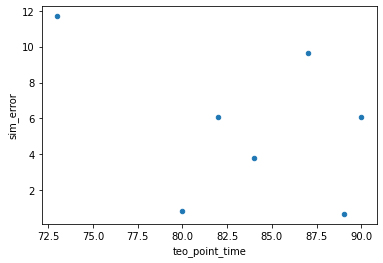

In [15]:
#Plot energy used depending of time.
sortedDF_times = current_features_info.sort_values(by=['Energy'])
sortedDF_times.plot(x='Energy', y = ['teo_point_time','sim_drone_time'], kind = 'bar')

#Compute and plot theorical vs simulated error
teo_sim_times_df = current_features_info[ ['teo_point_time','sim_drone_time'] ]
teo_sim_times_df['sim_error'] = teo_sim_times_df['teo_point_time'] - teo_sim_times_df['sim_drone_time'] 
teo_sim_times_df['sim_error'] = teo_sim_times_df['sim_error'].abs()
teo_sim_times_df.plot(x='teo_point_time', y = 'sim_error', kind = 'scatter')

### Teorical velocity.

<AxesSubplot:xlabel='teo_point_vel'>

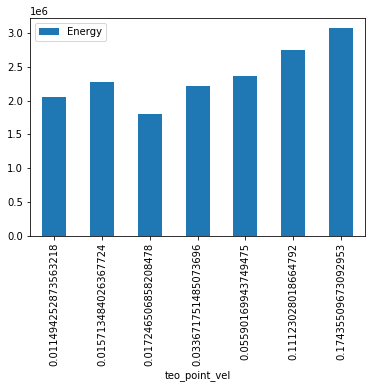

In [11]:
sortedDF_time = current_features_info.sort_values(by=['teo_point_vel'])
sortedDF_time.plot(x='teo_point_vel', y = 'Energy', kind = 'bar')

### Energy used in each point.

<AxesSubplot:xlabel='missing_points'>

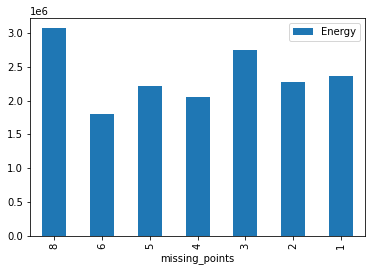

In [12]:
#Plot energy used in each point.
current_features_info.plot(x='missing_points', y = 'Energy', kind = 'bar')